In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('ex2data1.txt', sep = ',')

In [3]:
dataset.columns = ['x1', 'x2', 'y'] 

In [4]:
x1 = dataset['x1']
x2 = dataset['x2']
Y = dataset['y']

In [5]:
x1.shape

(100,)

In [28]:
X = np.stack([np.ones(x1.shape[0]), x1, x2]).T
theta = np.array([0., 0., 0.])
lr = 0.03

In [19]:
def sigma(z):
    return 1/(1 + np.exp(-z))

In [20]:
dw_s=0
for _ in range(10000):
    Z = X.dot(theta)
    a = sigma(Z)
    dz = a - Y
    dw = X.T.dot(dz)/len(dataset)
    dw_s = dw_s*0.9 + 0.1*dw
    theta -= lr*dw_s

In [21]:
print(theta)
aa = -theta[1]/theta[2]
bb = -theta[0]/theta[2]
def g(x):
    return aa*x + bb

[-10.80911549   0.09184874   0.08566432]


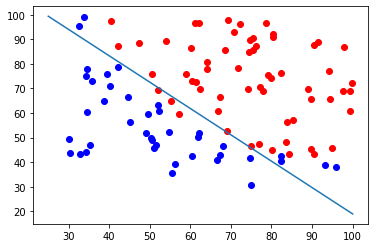

In [23]:
i = 0
while(i < len(x1)):
    if dataset['y'][i] == 1:
        plt.plot(dataset['x1'][i], dataset['x2'][i], 'ro')
    else:
        plt.plot(dataset['x1'][i], dataset['x2'][i], 'bo')
    i = i + 1

#plt.plot(x1[red], x2[red], 'ro')
#plt.plot(x1[blue], x2[blue], 'bo')
_x = [25, 100]
_y = [g(i) for i in _x]
plt.plot(_x, _y)

plt.show()